## Categorical gridded data

In this example, we will visualise "type of vegetation" data from the [ERA5 reanalysis dataset](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-monthly-means) in the C3S Climate Data Store.

In [1]:
import earthkit.data
import earthkit.plots

To retrieve data from the CDS, we use the `"cds"` source type with `earthkit.data.from_source`. For more information, see the earthkit-data documentation page on [retrieving data from the CDS](https://earthkit-data.readthedocs.io/en/latest/examples/cds.html).

In [2]:
data = earthkit.data.from_source(
    "cds",
    "reanalysis-era5-single-levels-monthly-means",
    {
        "product_type": "monthly_averaged_reanalysis",
        "year": "2018",
        "month": "05",
        "time": "00:00",
        "data_format": "grib",
        "download_format": "unarchived",
        "variable": "type_of_high_vegetation",
    },
)

We can take a look at xarray's representation of the data to quickly see that the categorical `tvh` variable (type of high vegetation) has numerical floating point values.

In [3]:
data.to_xarray()

<xarray.Dataset> Size: 4MB
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 721,
                 longitude: 1440)
Coordinates:
  * number      (number) int64 8B 0
  * time        (time) datetime64[ns] 8B 2018-05-01
  * step        (step) timedelta64[ns] 8B 00:00:00
  * surface     (surface) float64 8B 0.0
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time, step) datetime64[ns] 8B ...
Data variables:
    tvh         (number, time, step, surface, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-03T09:13 GRIB to CDM+CF via cfgrib-0.9.1...

From the ERA5 documentation, we know that the types of high vegetation are categorised with the following values:
- 0: No vegetation
- 3: Evergreen needle
- 4: Deciduous needle
- 5: Deciduous broad
- 6: Evergreen broad
- 18: Mixed forest/wood
- 19: Interrupted forest

Using a special `Categorical` style from earthkit plots, we can easily associate each value in the data with its category by passing the `levels` argument as a dictionary.

In [4]:
style = earthkit.plots.styles.Categorical(
    levels={
        3: "Evergreen needle",
        4: "Deciduous needle",
        5: "Deciduous broad",
        6: "Evergreen broad",
        18: "Mixed forest/wood",
        19: "Interrupted forest",
    },
    colors=[
        "#33cc33",
        "#ffd700",
        "#ff9900",
        "#009933",
        "#0066cc",
        "#cc6600",
    ],
)

Now we can plot our data with this style:

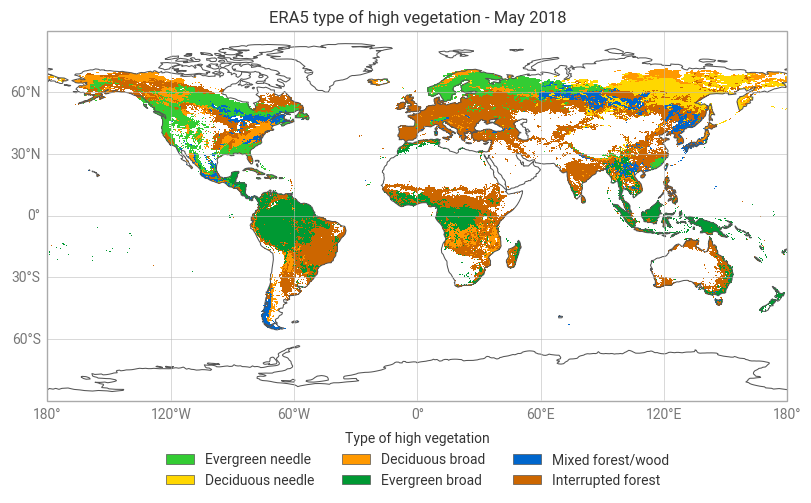

In [5]:
chart = earthkit.plots.Map()

chart.grid_cells(data, style=style)

chart.title("ERA5 {variable_name!l} - {time:%B %Y}")

chart.coastlines(resolution="low")
chart.gridlines()

chart.legend(location="bottom", label="{variable_name}", ncols=3)

chart.show()